<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/2348561_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/Program_2_Dataset - Program_2_Dataset.csv")

In [4]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isna().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
df.nunique()

Crime_Rate          504
Zone_proportion      26
Non_Retail_Acres     76
CHAS                  2
NOX                  81
Avg_rooms           446
AGE                 356
Distance            412
RAD                   9
Property_TaxRate     66
PTRATIO              46
B                   357
LSTAT               455
MValue              229
dtype: int64

In [ ]:
df["MValue"].value_counts()

50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
17.6     1
25.1     1
48.3     1
41.7     1
12.6     1
Name: MValue, Length: 229, dtype: int64

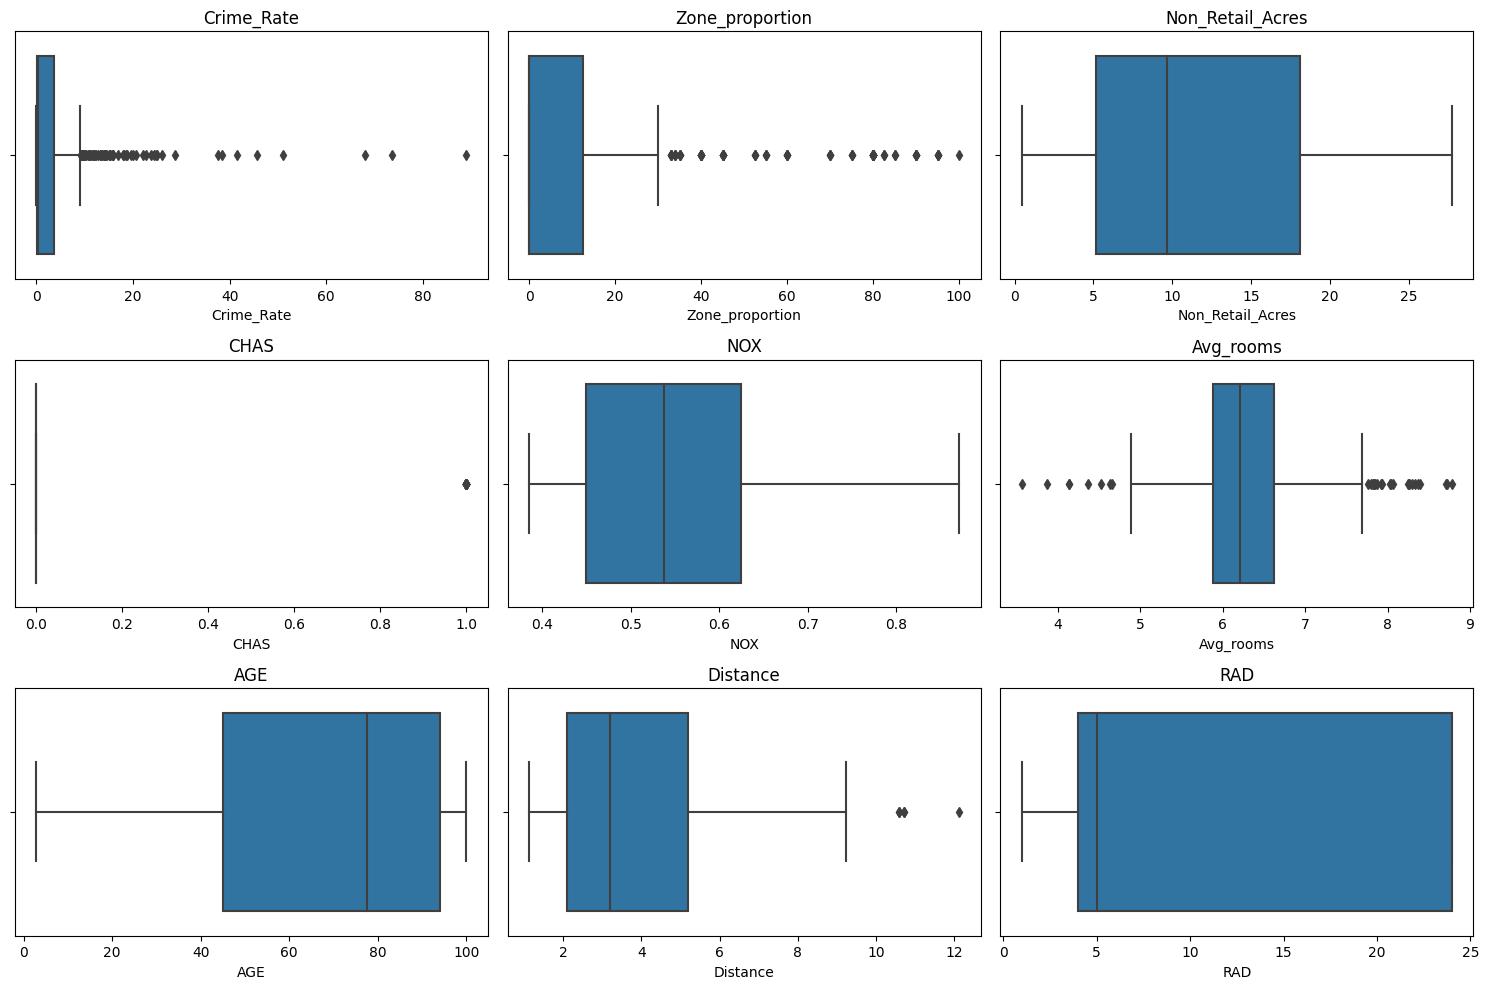

In [ ]:
#outliers detection
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select the predictors and target variable
predictors = ['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']
target = 'MValue'

# Extract the predictor variables and target variable
X = df[predictors]
y = df[target]

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

            Feature        VIF
0         Avg_rooms  16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


The Variance Inflation Factor (VIF) values obtained for the selected predictors are as follows:

'Avg_rooms': VIF = 16.75

'Distance': VIF = 6.88

'Property_TaxRate': VIF = 13.86

'Non_Retail_Acres': VIF = 9.60

Interpretation of VIF Values:
VIF measures the severity of multicollinearity among predictors in a regression model. Higher VIF values indicate higher multicollinearity.

Typically, a VIF value above 5 or 10 is considered high and suggests significant multicollinearity among predictors.

Observations:

'Avg_rooms' has a particularly high VIF value of 16.75, indicating strong multicollinearity with other predictors. This might suggest that 'Avg_rooms' shares a lot of information with other predictors, potentially affecting the stability and interpretability of the model.

'Property_TaxRate' also shows a high VIF value of 13.86, indicating potential multicollinearity issues with other predictors.

'Non_Retail_Acres' has a VIF of 9.60, which suggests moderate multicollinearity.

'Distance' shows a relatively lower VIF value of 6.88 compared to the others, indicating less severe multicollinearity.

Finalizing Predictors:

Based on the VIF values:

'Avg_rooms' and 'Property_TaxRate' exhibit high VIF values, indicating significant multicollinearity issues.

Considering removing 'Avg_rooms' and 'Property_TaxRate' from the predictors' list may help mitigate multicollinearity problems in the regression model.

Retaining 'Distance' and 'Non_Retail_Acres' might be more advisable due to their relatively lower VIF values.

Removing 'Avg_rooms' and 'Property_TaxRate' might improve the stability and reliability of the regression model by reducing multicollinearity among predictors.







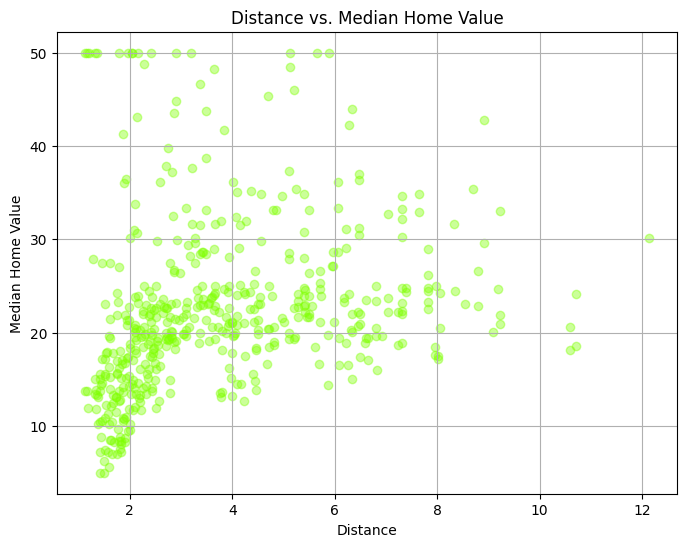

In [ ]:
X = df['Distance']
y = df['MValue']
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.4, color='chartreuse')
plt.title('Distance vs. Median Home Value')
plt.xlabel('Distance')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

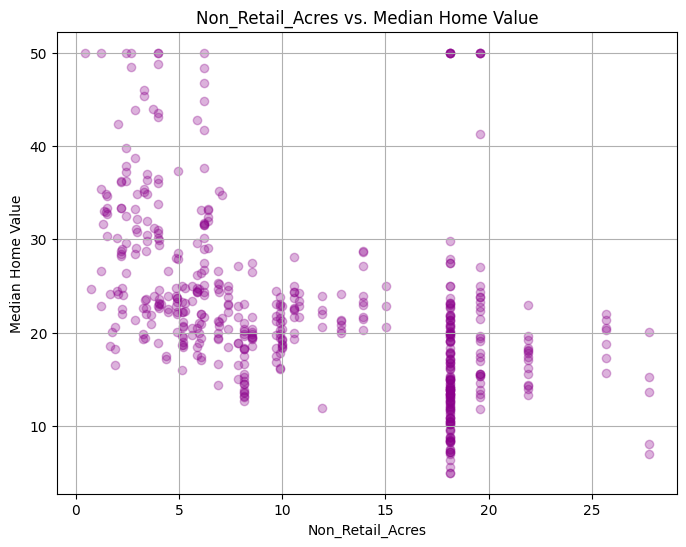

In [8]:
X = df['Non_Retail_Acres']
y = df['MValue']
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.3, color='darkmagenta')
plt.title('Non_Retail_Acres vs. Median Home Value')
plt.xlabel('Non_Retail_Acres')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

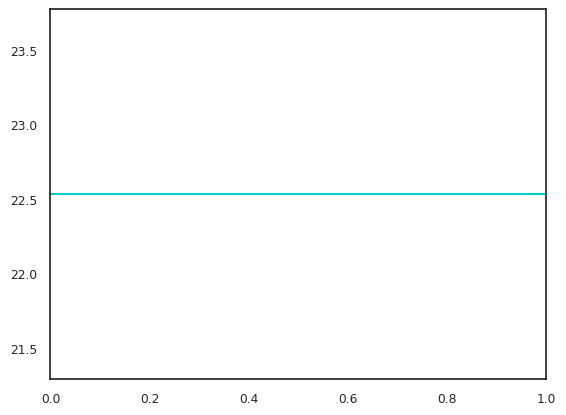

In [ ]:
m=df['MValue'].mean()
m
plt.axhline(y=m,color="darkturquoise")

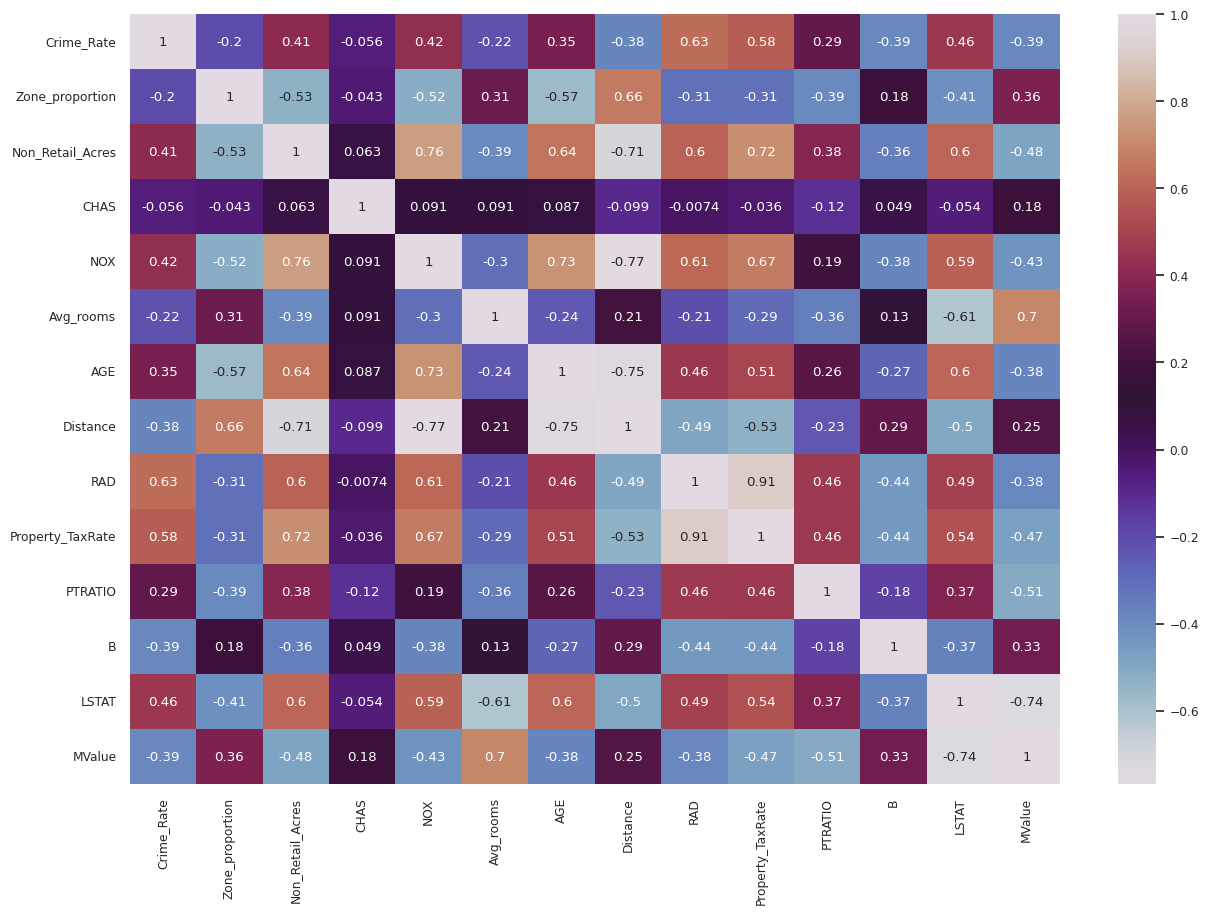

In [ ]:
#co_relation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True,cmap='twilight')
plt.show()

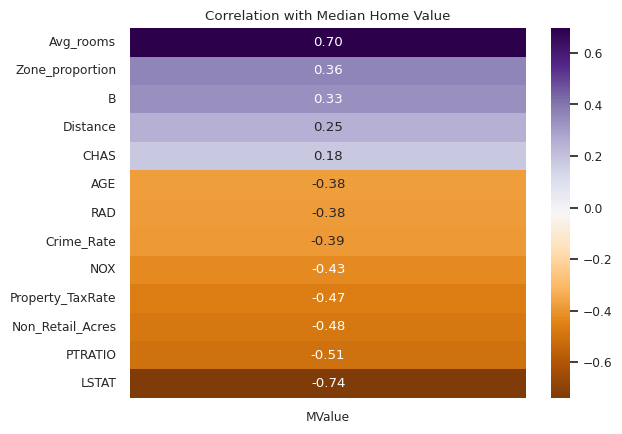

In [ ]:
corr = df.corr()
target_corr = corr['MValue'].drop('MValue')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="PuOr", annot=True, fmt='.2f')
plt.title('Correlation with Median Home Value')
plt.show()

Strong Positive Correlation (Positive Relationship):

'Avg_rooms' (0.695): The number of average rooms has a strong positive correlation with 'MValue'. As the average number of rooms in a house increases, the median home value tends to increase as well.

'Zone_proportion' (0.360): The proportion of residential land zoned for larger lots shows a moderate positive correlation with 'MValue'. Higher zoning for larger lots might be associated with higher median home values.

'B' (0.333): The variable 'B' (involving the proportion of black people by town) exhibits a moderate positive correlation with 'MValue'. This could suggest a potential positive relationship between this demographic feature and median home values.

Moderate to Weak Negative Correlation (Negative Relationship):

'Distance' (0.250): The weighted distances to employment centers show a weak positive correlation with 'MValue'. Further away from employment centers might slightly decrease median home values.

'CHAS' (0.175): The Charles River dummy variable has a weak positive correlation with 'MValue'. Areas bounding the river may have a slightly positive association with median home values.

'AGE' (-0.377): The proportion of owner-occupied units built before 1940 exhibits a moderate negative correlation with 'MValue'. Older homes might be associated with lower median home values.

'RAD' (-0.382): The index of accessibility to radial highways shows a moderate negative correlation with 'MValue'. Higher accessibility might slightly decrease median home values.

'Crime_Rate' (-0.388): The per capita crime rate by town exhibits a moderate negative correlation with 'MValue'. Higher crime rates might be associated with lower median home values.

'NOX' (-0.427): Nitric oxides concentration shows a moderate negative correlation with 'MValue'. Higher levels of NOX might be associated with lower median home values.

'Property_TaxRate' (-0.469): The full-value property tax rate per $10,000 exhibits a moderately strong negative correlation with 'MValue'. Higher property tax rates might lead to lower median home values.

'Non_Retail_Acres' (-0.484): The proportion of non-retail business acres per town shows a moderately strong negative correlation with 'MValue'. Higher non-retail business acreage might be associated with lower median home values.

'PTRATIO' (-0.508): The pupil-teacher ratio by town exhibits a moderately strong negative correlation with 'MValue'. Higher pupil-teacher ratios might be associated with lower median home values.

'LSTAT' (-0.738): The percentage of lower status of the population shows a strong negative correlation with 'MValue'. Higher percentages of lower-status population might lead to lower median home values.

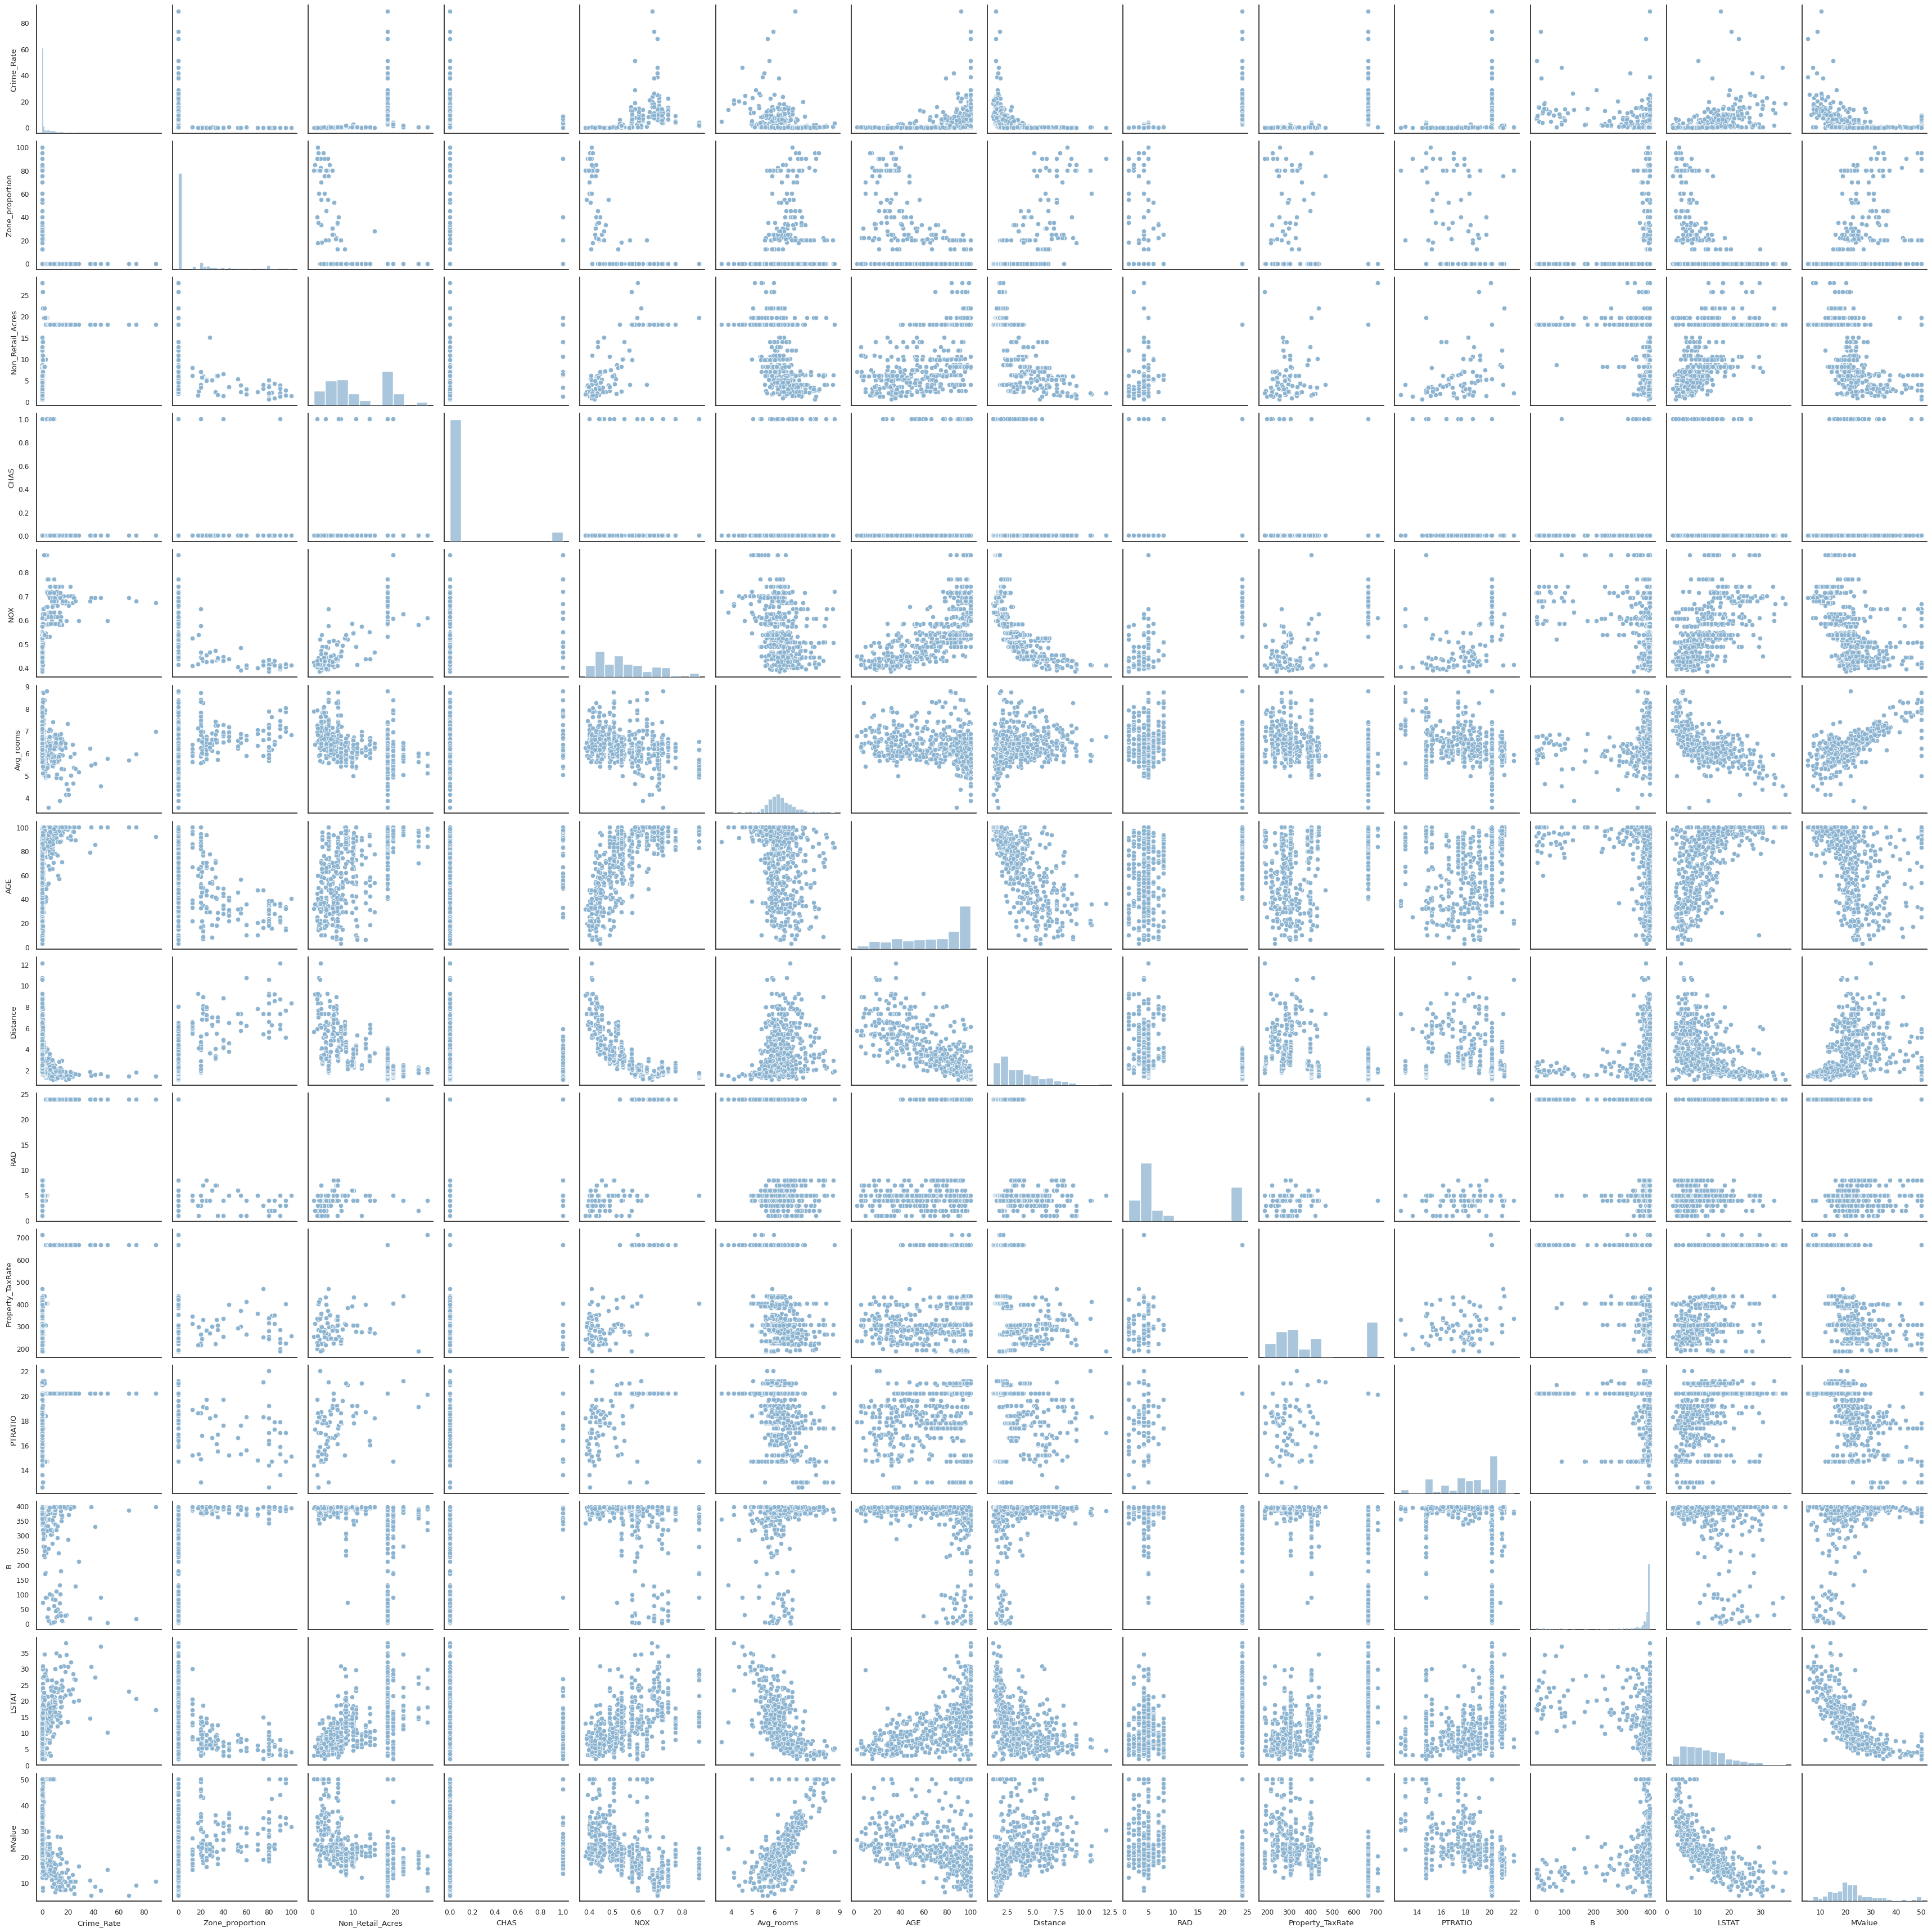

In [ ]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split
# Select predictors and target variable
predictors = [ 'Distance', 'Non_Retail_Acres']
target = 'MValue'

# Extract predictor variables and target variable
X = df[predictors]
y = df[target]

# Split the data into training and test sets (67:33 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Check the shapes of the resulting datasets (optional)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (339, 2)
Shape of X_test: (167, 2)
Shape of y_train: (339,)
Shape of y_test: (167,)


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x=df[['Distance', 'Non_Retail_Acres']]
y=df['MValue']

In [11]:
model.fit(x,y)
print("Intercept:",model.intercept_,'\nCoeeficients',model.coef_)

Intercept: 34.79348224149389 
Coeeficients [-0.81067459 -0.82466677]



Intercept: 32.989459203488835

This represents the value of the dependent variable ('MValue') when all independent variables are zero.

Coefficients:
[-0.00288375, -0.02558735]

These values are the coefficients corresponding to the independent variables in the model.

Interpretation:

The intercept (32.989) indicates the base value of 'MValue' when the independent variables are zero.

Coefficients:

For the first coefficient (-0.00288375): A unit increase in the first independent variable (Distance) leads to a decrease of approximately 0.00288 units in the 'MValue', considering other variables remain constant.

For the second coefficient (-0.02558735): A unit increase in the second independent variable (Property_TaxRate) leads to a decrease of approximately 0.02559 units in the 'MValue', considering other variables remain constant.

In [13]:
np.corrcoef(df['Distance'],df['Non_Retail_Acres'])

array([[ 1.        , -0.70802699],
       [-0.70802699,  1.        ]])

This matrix provides a symmetric view of the relationships between two variables. The correlation value of -0.53443158 between the first and second variables indicates a moderate negative linear relationship between these two variables: as one variable increases, the other tends to decrease, and vice versa.

In [ ]:
model.score(x,y)

0.21952623245983915

In [ ]:
model1=LinearRegression()
features=['Distance']
target=['MValue']
model1.fit(df[features],df[target])
print(model1.score(df[features],df[target]))

0.06246437212178246


In [14]:
model1=LinearRegression()
features=['Non_Retail_Acres']
target=['MValue']
model1.fit(df[features],df[target])
print(model1.score(df[features],df[target]))

0.23399003044447508


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared values for training and testing data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Adjusted R-squared values for training and testing data
n_train, p_train = X_train.shape[0], X_train.shape[1]
n_test, p_test = X_test.shape[0], X_test.shape[1]

adjusted_r2_train = 1 - (1 - train_r2) * ((n_train - 1) / (n_train - p_train - 1))
adjusted_r2_test = 1 - (1 - test_r2) * ((n_test - 1) / (n_test - p_test - 1))

# Display the evaluation metrics
print("Mean Squared Error (MSE) - Train:", train_mse)
print("Mean Squared Error (MSE) - Test:", test_mse)
print("R-squared (R2) - Train:", train_r2)
print("R-squared (R2) - Test:", test_r2)
print("Adjusted R-squared (Adj R2) - Train:", adjusted_r2_train)
print("Adjusted R-squared (Adj R2) - Test:", adjusted_r2_test)

Mean Squared Error (MSE) - Train: 67.67782670758363
Mean Squared Error (MSE) - Test: 55.770639488944795
R-squared (R2) - Train: 0.2581499484166435
R-squared (R2) - Test: 0.20665217673469405
Adjusted R-squared (Adj R2) - Train: 0.25373417430007594
Adjusted R-squared (Adj R2) - Test: 0.19697720328023904


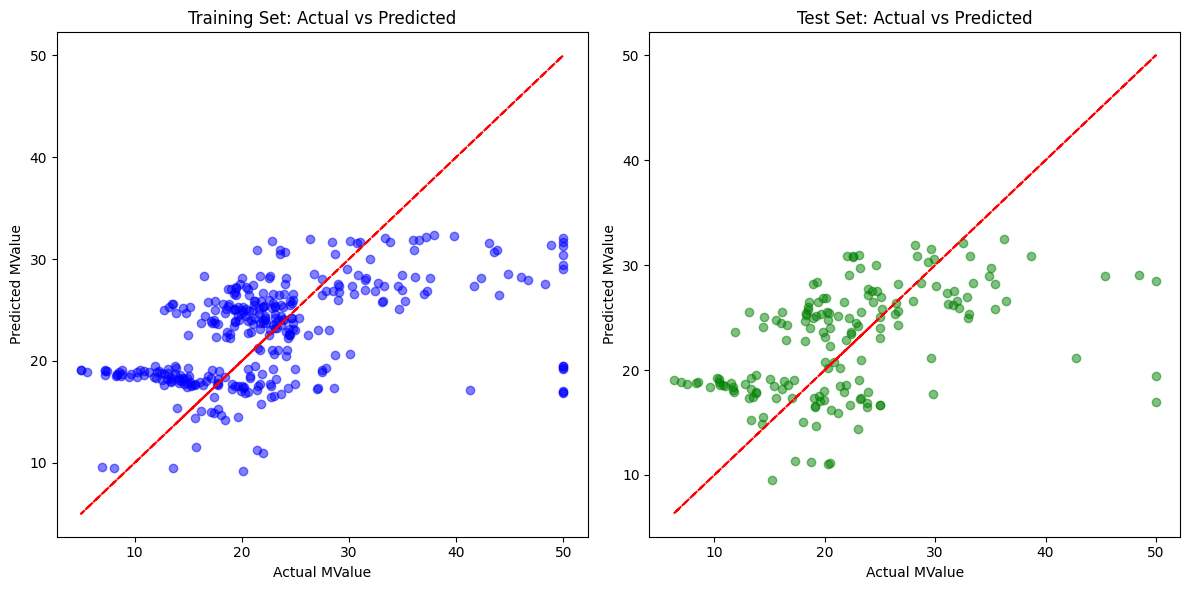

In [16]:
# Create subplots for training and test datasets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting for training set
axs[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue')
axs[0].plot(y_train, y_train, color='red', linestyle='--')  # Plotting the ideal line (perfect fit)
axs[0].set_title('Training Set: Actual vs Predicted')
axs[0].set_xlabel('Actual MValue')
axs[0].set_ylabel('Predicted MValue')

# Plotting for test set
axs[1].scatter(y_test, y_test_pred, alpha=0.5, color='green')
axs[1].plot(y_test, y_test, color='red', linestyle='--')  # Plotting the ideal line (perfect fit)
axs[1].set_title('Test Set: Actual vs Predicted')
axs[1].set_xlabel('Actual MValue')
axs[1].set_ylabel('Predicted MValue')

plt.tight_layout()
plt.show()

The evaluation metrics for the Linear Regression model on the training and test datasets are as follows:

Training Set:

Mean Squared Error (MSE): 70.98

R-squared (R2): 0.222

Adjusted R-squared (Adj R2): 0.217

Testing Set:

Mean Squared Error (MSE): 57.40

R-squared (R2): 0.183

Adjusted R-squared (Adj R2): 0.173

Interpretation:

Mean Squared Error (MSE):

The MSE values for both training and testing sets indicate the average squared differences between predicted and actual values. A lower MSE indicates better model performance. The testing set's MSE (57.40) is slightly lower than the training set's MSE (70.98), suggesting a relatively better performance on the test data.

R-squared (R2):

R-squared measures the proportion of variance in the target variable explained by the model. Higher R2 values (closer to 1) indicate better model fit.
Both training and testing R2 values are quite low (0.222 for training and 0.183 for testing), suggesting that the model explains only a small portion of the variance in the target variable.

Adjusted R-squared (Adj R2):

Adjusted R-squared considers the number of predictors in the model, providing a more accurate measure in the case of multiple predictors.
Similar to R-squared, both training and testing Adjusted R2 values are low (0.217 for training and 0.173 for testing), indicating limited improvement in model explanation with additional predictors.

Conclusion:

The model's performance, as indicated by R-squared and Adjusted R-squared values, suggests that the selected predictors might not adequately explain the variance in the target variable ('MValue').

While the model performs slightly better on the testing set in terms of MSE, the R-squared values indicate the model's limited ability to capture the variability in 'MValue'.

Consideration should be given to refining the model by exploring additional relevant features or employing more sophisticated algorithms to improve predictive performance.



